## Name: Tanguturi Sandeep Kumar

# Data Analysis of a Super Store

**This is the Exploratory Data Analysis of a superstore as part of the task completion of GRIP Internship organised by the Sparks Foundation. The objective of this task is to find out the weak areas where the superstore can work more to increase their profits and to give an insight of what problems can arise in their business by exploring the data.**

Let us import all the necessary libraries using their common aliasing and set some of the default styles for the plots.

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

sns.set_style('darkgrid')
matplotlib.rcParams['font.size'] = 14
matplotlib.rcParams['figure.figsize'] = (9, 5)
matplotlib.rcParams['figure.facecolor'] = '#00000000'

## Reading and Inspecting the data

Reading the csv file into a pandas dataframe.

In [2]:
raw_df=pd.read_csv('SampleSuperstore.csv')

In [3]:
raw_df

,Ship Mode,Segment,Country,City,State,Postal Code,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
0,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Bookcases,261.9600,2,0.00,41.9136
1,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Chairs,731.9400,3,0.00,219.5820
2,Second Class,Corporate,United States,Los Angeles,California,90036,West,Office Supplies,Labels,14.6200,2,0.00,6.8714
3,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Furniture,Tables,957.5775,5,0.45,-383.0310
4,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Office Supplies,Storage,22.3680,2,0.20,2.5164
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9989,Second Class,Consumer,United States,Miami,Florida,33180,South,Furniture,Furnishings,25.2480,3,0.20,4.1028
9990,Standard Class,Consumer,United States,Costa Mesa,California,92627,West,Furniture,Furnishings,91.9600,2,0.00,15.6332
9991,Standard Class,Consumer,United States,Costa Mesa,California,92627,West,Technology,Phones,258.5760,2,0.20,19.3932
9992,Standard Class,Consumer,United States,Costa Mesa,California,92627,West,Office Supplies,Paper,29.6000,4,0.00,13.3200


In [4]:
raw_df['Region'].unique()

array(['South', 'West', 'Central', 'East'], dtype=object)

In [5]:
raw_df.columns

Index(['Ship Mode', 'Segment', 'Country', 'City', 'State', 'Postal Code',
       'Region', 'Category', 'Sub-Category', 'Sales', 'Quantity', 'Discount',
       'Profit'],
      dtype='object')

In [6]:
raw_df['Ship Mode'].unique()

array(['Second Class', 'Standard Class', 'First Class', 'Same Day'],
      dtype=object)

In [7]:
raw_df['City'].nunique()

531

In [8]:
raw_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Ship Mode     9994 non-null   object 
 1   Segment       9994 non-null   object 
 2   Country       9994 non-null   object 
 3   City          9994 non-null   object 
 4   State         9994 non-null   object 
 5   Postal Code   9994 non-null   int64  
 6   Region        9994 non-null   object 
 7   Category      9994 non-null   object 
 8   Sub-Category  9994 non-null   object 
 9   Sales         9994 non-null   float64
 10  Quantity      9994 non-null   int64  
 11  Discount      9994 non-null   float64
 12  Profit        9994 non-null   float64
dtypes: float64(3), int64(2), object(8)
memory usage: 1015.1+ KB


As we can see, the data does not hold any null values. So, we need not process this data any more.

In [9]:
raw_df.describe()

,Postal Code,Sales,Quantity,Discount,Profit
count,9994.000000,9994.000000,9994.000000,9994.000000,9994.000000
mean,55190.379428,229.858001,3.789574,0.156203,28.656896
std,32063.693350,623.245101,2.225110,0.206452,234.260108
min,1040.000000,0.444000,1.000000,0.000000,-6599.978000
25%,23223.000000,17.280000,2.000000,0.000000,1.728750
50%,56430.500000,54.490000,3.000000,0.200000,8.666500
75%,90008.000000,209.940000,5.000000,0.200000,29.364000
max,99301.000000,22638.480000,14.000000,0.800000,8399.976000


**As we can observe, there are no null values in any of the columns. So, our data is clean and no need to modify the existing columns but add some useful columns to it which help in visualizing the profits relatively. Lets calculate the profit percentage on each sale of the item and add that new column to our df.**

In [10]:
raw_df['Profit %']=raw_df['Profit']/raw_df['Sales']*100

In [11]:
raw_df['Profit %']

0       16.00
1       30.00
2       47.00
3      -40.00
4       11.25
        ...  
9989    16.25
9990    17.00
9991     7.50
9992    45.00
9993    30.00
Name: Profit %, Length: 9994, dtype: float64

***Thus, we have now got our new column in the df. we can now proceed for out exploration of data of different columns.***

## Exploring and Visualizing the Data 

**-> It is very much essential to analyze the data by grouping it based on category inorder to figure out the areas to be improved.**

### 1.Category wise distribution of profit and sales:

Thus, we group the data by category and then by sub-category and aggregate them over sum to explore the data in depth. we then inspect the sales column and profit column.

In [12]:
category_df= raw_df.groupby('Category')[['Sales','Profit']].sum()

Let us also calculate the percentage of the profit achieved over total sales in each category.

In [13]:
category_df['profit %']=category_df['Profit']*100/category_df['Sales']

In [14]:
category_df

,Sales,Profit,profit %
Category,,,
Furniture,741999.7953,18451.2728,2.486695
Office Supplies,719047.0320,122490.8008,17.035158
Technology,836154.0330,145454.9481,17.395712


**A pie chart best suits for displaying the contributions of each category in the total profit. So why not plot one?**

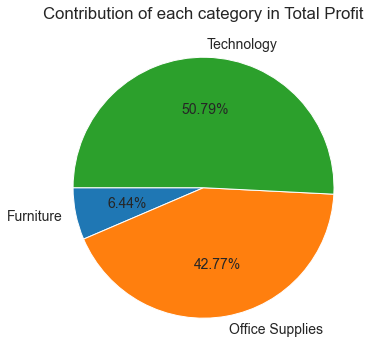

In [15]:
plt.figure(figsize=(12,6))
plt.title('Contribution of each category in Total Profit')
plt.pie(category_df.Profit, labels=category_df.index, autopct='%2.2f%%', startangle=180);

***These numbers clearly indicate that Furniture is not profitable to the expected extent though its overall sales are similar to that of remaining categories.***

**Now that we have come to know that Furniture is the area to be taken into consideration, lets inspect the contribution of each sub-category of Furniture.**

In [16]:
furniture_df=raw_df[raw_df['Category']=='Furniture']

In [17]:
sub_category_df= furniture_df.groupby('Sub-Category')[['Sales','Profit']].sum()

In [18]:
sub_category_df['profit %']=sub_category_df['Profit']*100/sub_category_df['Sales']

In [19]:
sub_category_df

,Sales,Profit,profit %
Sub-Category,,,
Bookcases,114879.9963,-3472.5560,-3.022768
Chairs,328449.1030,26590.1663,8.095673
Furnishings,91705.1640,13059.1436,14.240358
Tables,206965.5320,-17725.4811,-8.564460


***Therefore, the sub-categories of Furniture-(Bookcases and Tables)are the ones to be taken care of to improve the profits.***

**Perform the same analsyis for Office supplies and Technology categories to know which sub-categories of them are contributing to what extent.**

In [20]:
office_supplies_df=raw_df[raw_df['Category']=='Office Supplies']

In [21]:
sub_category_df1= office_supplies_df.groupby('Sub-Category')[['Sales','Profit']].sum()

In [22]:
sub_category_df1['profit %']=sub_category_df1['Profit']/sub_category_df1['Sales']*100

In [23]:
sub_category_df1

,Sales,Profit,profit %
Sub-Category,,,
Appliances,107532.161,18138.0054,16.867517
Art,27118.792,6527.7870,24.071083
Binders,203412.733,30221.7633,14.857361
Envelopes,16476.402,6964.1767,42.267582
Fasteners,3024.280,949.5182,31.396504
Labels,12486.312,5546.2540,44.418672
Paper,78479.206,34053.5693,43.391837
Storage,223843.608,21278.8264,9.506113
Supplies,46673.538,-1189.0995,-2.547695


We can observe that Paper and Binders are the major contributing factors for profit, thus there is a need to maintain the stability of these products with same profit , while the supplies are being sold for losses, which indicates that prices of the supplies have to be increased and bring them into profits.

In [24]:
Technology_df=raw_df[raw_df['Category']=='Technology']

In [25]:
sub_category_df2= Technology_df.groupby('Sub-Category')[['Sales','Profit']].sum()

In [26]:
sub_category_df2['profit %']=sub_category_df2['Profit']*100/sub_category_df2['Sales']

In [27]:
sub_category_df2

,Sales,Profit,profit %
Sub-Category,,,
Accessories,167380.318,41936.6357,25.054700
Copiers,149528.030,55617.8249,37.195585
Machines,189238.631,3384.7569,1.788618
Phones,330007.054,44515.7306,13.489327


**Now, its time to compare all the three categories along with their sub-categories in a single plot side by side. A bar chart can serve our purpose.**

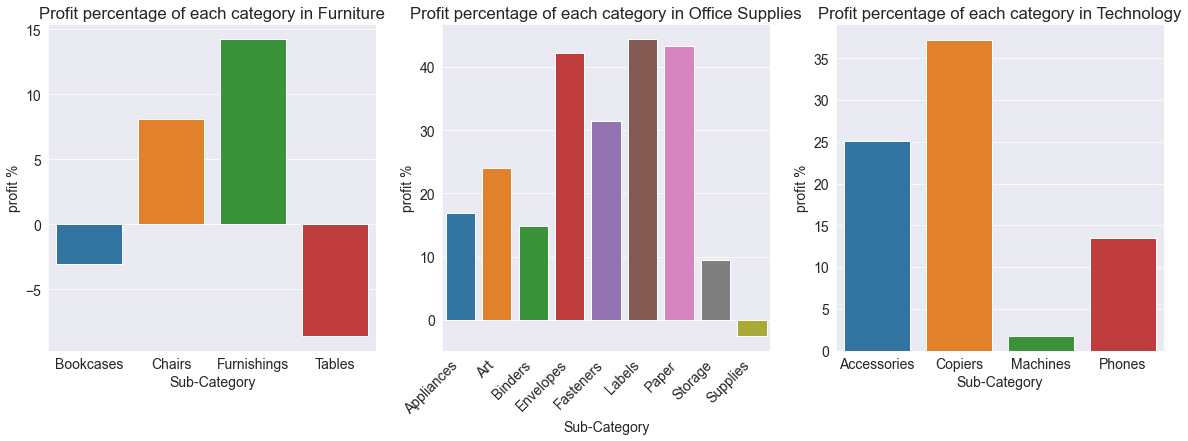

In [28]:
fig, axes = plt.subplots(1, 3, figsize=(20, 6))

axes[0].set_title('Profit percentage of each category in Furniture')
sns.barplot(x=sub_category_df.index,y=sub_category_df['profit %'],ax=axes[0])

axes[2].set_title('Profit percentage of each category in Technology')
sns.barplot(x=sub_category_df2.index,y=sub_category_df2['profit %'],ax=axes[2]);

axes[1].set_title('Profit percentage of each category in Office Supplies')
sns.barplot(x=sub_category_df1.index,y=sub_category_df1['profit %'],ax=axes[1]);

axes[1].set_xticklabels(axes[1].get_xticklabels(), rotation=45, ha='right');

***These plots show that the maximum percentage of profits are coming from Offile supplies, while the loss is occuring majorly due to sub categories of furniture like Bookcases and Tables. Also, Technolgy is not out of the major contributing factors for profit. Infact, it is the only category where no item is sold at loss.***

### 2. Segment wise distribution of profit:

**We shall now investigate the profit obtained from various segments in a barchart**

In [29]:
segment_df = raw_df.groupby('Segment')[['Sales','Profit']].sum()

In [30]:
segment_df['Profit %']= segment_df['Profit']*100/segment_df['Sales']

In [31]:
segment_df

,Sales,Profit,Profit %
Segment,,,
Consumer,1.161401e+06,134119.2092,11.548050
Corporate,7.061464e+05,91979.1340,13.025506
Home Office,4.296531e+05,60298.6785,14.034269


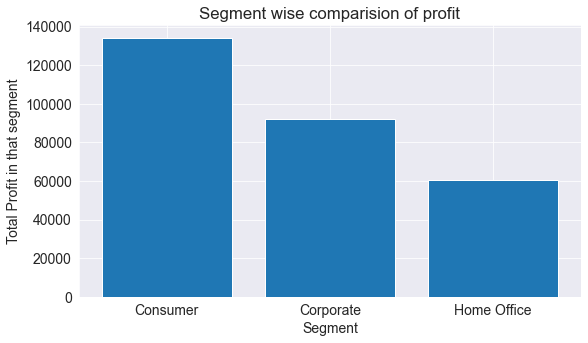

In [32]:
plt.xlabel('Segment')
plt.ylabel('Total Profit in that segment')
plt.title('Segment wise comparision of profit')
plt.bar(segment_df.index, segment_df['Profit']);

**Consumer segment is the most significant segment interms of profit. Almost 1.5 times the profit of Corporate segment and more than twice of the profit of Home Office.**

### 3. Exploring the sales Region wise:

**The last thing to explore is the effect of region over the sales of items:**

In [33]:
region_df = raw_df.groupby('Region')[['Sales','Profit']].sum()

In [34]:
region_df['Profit %']= region_df['Profit']*100/region_df['Sales']

**We can plot a bar chart and conclude out results.**

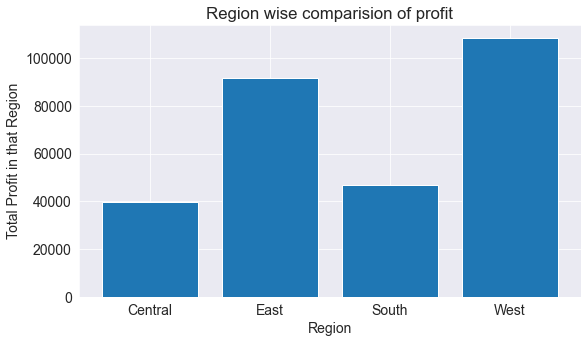

In [35]:
plt.xlabel('Region')
plt.ylabel('Total Profit in that Region')
plt.title('Region wise comparision of profit')
plt.bar(region_df.index, region_df['Profit']);

**Now, the question arises, what are the categories that bring huge difference in profit among the regions. Let us seperate these regions and examine them.**

In [36]:
south_df=raw_df[raw_df['Region']=='South']
west_df=raw_df[raw_df['Region']=='West']

In [37]:
south_grp=south_df.groupby('Category')['Sales'].sum()
west_grp=west_df.groupby('Category')['Sales'].sum()

In [38]:
south_f=south_grp.to_frame()
west_f=west_grp.to_frame()

In [39]:
south_f

,Sales
Category,
Furniture,117298.684
Office Supplies,125651.313
Technology,148771.908


In [40]:
west_f

,Sales
Category,
Furniture,252612.7435
Office Supplies,220853.2490
Technology,251991.8320


***Almost all the categories have equal contributions to profit in any region. So, the sales of all the categories must be increased in the South and Central regions to obtain more profit.***

## ***Asking and answering questions*** 

### **1.Is the superstore running in profit or loss? What percentage of profit or loss is the superstore having over its total sales?**

In [41]:
total_profit=raw_df['Profit'].sum()

In [42]:
total_sales=raw_df['Sales'].sum()

In [43]:
percentage= total_profit/total_sales*100

In [44]:
percentage

12.467217240315604

***Thus, the superstore is making a profit of 12.4% over its total sales.***

### 2. Which category items are sold the most interms of quantity?

In [45]:
Category_df=raw_df.groupby('Category')['Quantity'].sum()

In [46]:
Category_df

Category
Furniture           8028
Office Supplies    22906
Technology          6939
Name: Quantity, dtype: int64

***Office supplies items are sold the most interms of quantity.***

### 3.What amount of loss can be avoided if some of the items in the store can be discarded from selling?

**The idea is to find out the overall loss occuring due to some of the items. If we can discard those items which are leading for the loss, we can acheive greater profits on overall.**

In [47]:
loss_df = raw_df[raw_df['Profit']<0]

In [48]:
total_loss=loss_df['Profit'].sum()

In [49]:
total_loss

-156131.2857

***Thus, it is possible to avoid loss amount around one and half lakh if certain items are discarded from selling.***

## Conclusions and Inferences:

***Based on our exploration, we can conclude the following results:***

**1.The sales of the superstore are distributed among three segments: Consumer, Corporate, Home supplies. These segments are spread over four regions: West, East, Central and South. Each of the item sold belongs to one of the categories: Furniture, Office supplies or Technology.**

**2. Furniture is the lowest contributing category in the overall profit(only about 6%). Thus, it is the weak area to be worked on more.**

**3. The sub categories Book cases and tables are the ones which cause loss. Thus, they must be discarded from selling or increase the prices to make profit.**

**4. Supplies is the sub category of Office supplies which is in loss and thus to be taken care of. Machines in Technology are not making the considerable profit(very less). So, they have to be improved in terms of manufacturing cost to make profits more.**

**5. Labels, Paper and envelopes are making most of the profit from Office supplies. Furnishings, Copiers and Accesories are also major contributors of profit. All these must be maintained in a state how they are at present.**

**6.Central and South regions are having less sales as compared to East and West regions. There is a need of marketing or an improvement in shipment process for the East and West regions.**

***The Problems that may arise as a business manager are:***

**1. Some areas(like Book cases and tables) are at huge loss, this is very challenging to bring this to profits. Also, it can not be discarded from selling, because if it is done so, the sales of other products might get affected.**

**2. The sales are unevenly distributed over different regions. Thus, its a challenging task to improve the sales in certain regions (whether to create faith in people over the products of their store or to make the shipping process better).**